**House Price Prediction with Random Forest Regressor Model**

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

**Importing Dataset**

In [ ]:
data = pd.read_csv('/hpp/train.csv')

In [ ]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.shape

(1460, 81)

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

**Feature Engineering**

**Handling Missing Values**

In [ ]:
dataset = data.copy()

<Axes: >

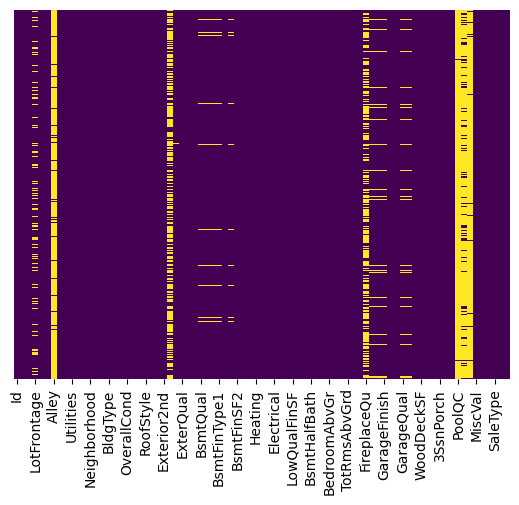

In [ ]:
import seaborn as sns
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
dataset.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


In [ ]:
# Remove those feature that have more than 10% Null Values.
#Less Than 10% Null
b=[]
for column in dataset.columns:
    a = dataset[column].isnull().sum()
    if(a/len(dataset) <= 0.10):
        b.append(column)
print(len(b))

74


In [ ]:
# More than 10% Null
c=[]
for column in dataset.columns:
    a = dataset[column].isnull().sum()
    if(a/len(dataset) >= 0.10):
        c.append(column)
print(c)

['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [ ]:
# Dropping columns that has more than 10% Null values.
dataset = dataset.drop(columns=['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],axis=1)

In [ ]:
dataset.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
# Categorical columns
cate_col = [column for column in dataset.columns if dataset[column].dtype == 'O']
print(cate_col)
print(len(cate_col))

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
37


In [ ]:
# Numerical columns
num_col = [column for column in dataset.columns if dataset[column].dtype != 'O']
print(num_col)
print(len(num_col))

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
37


In [ ]:
dataset.shape

(1460, 74)

In [ ]:
# Subtract year values with year sold in order to get total years
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    dataset[feature]=dataset['YrSold']-dataset[feature]

In [ ]:
dataset.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
dataset.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotArea,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0


In [ ]:
# Numerical Columns with NULL values.
num_col_na = [column for column in dataset.columns if (dataset[column].isnull().sum()>0) and (dataset[column].dtype != 'O')]
print(num_col_na)
print(len(num_col_na))

['MasVnrArea', 'GarageYrBlt']
2


In [ ]:
#Categorical Columns with NULL Values.
cate_col_na = [column for column in dataset.columns if (dataset[column].isnull().sum()>0) and (dataset[column].dtype == 'O')]
print(cate_col_na)
print(len(cate_col_na))

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
10


In [ ]:
# Filling "Missing" in place of NULL values in Categorical columns.
import statistics as stats
for column in cate_col_na:
    dataset[column] = dataset[column].fillna('Missing')

In [ ]:
# Filling Mean of that perticular column in NULL values
for column in num_col_na:
    dataset[column] = dataset[column].fillna(dataset[column].mean())

In [ ]:
dataset.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotArea,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0


In [ ]:
dataset.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
# Now that our data is cleaned, we will convert it into csv file
#dataset.to_csv('Cleaned-Test(new).csv')
#dataset.to_csv('Cleaned-Train(new).csv')

**Train Dataset**

In [306]:
dataset = pd.read_csv('Cleaned-Train(new).csv')
dataset.shape

(1460, 75)

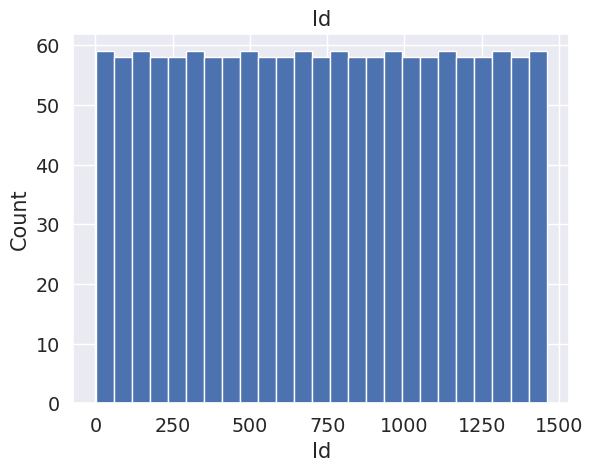

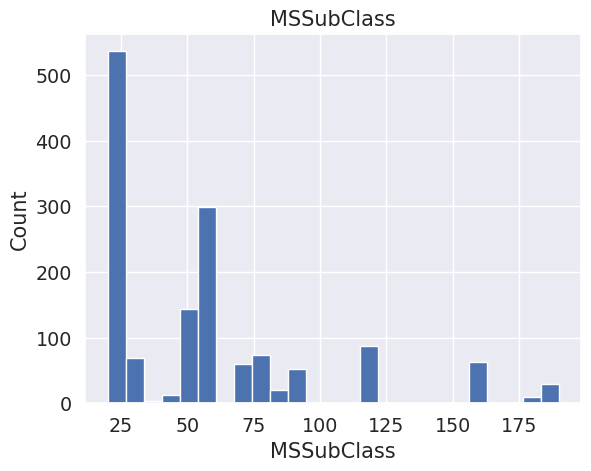

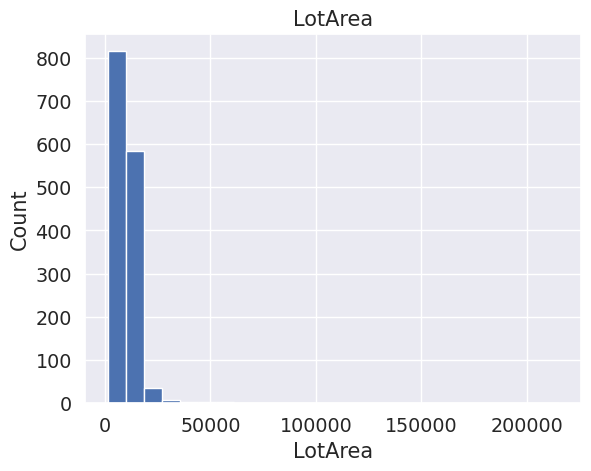

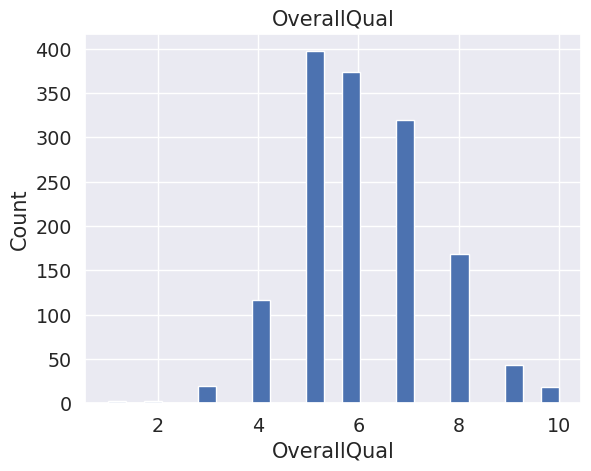

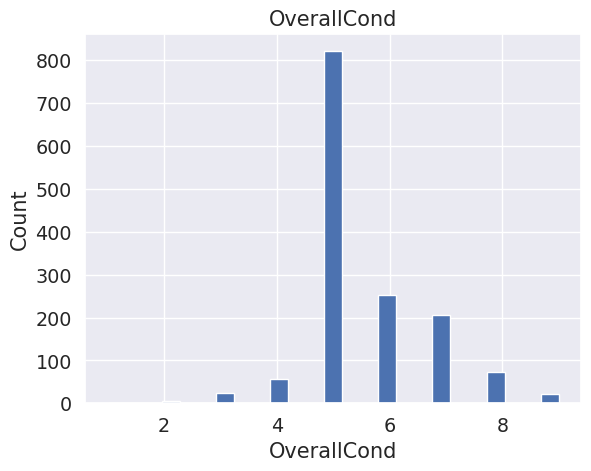

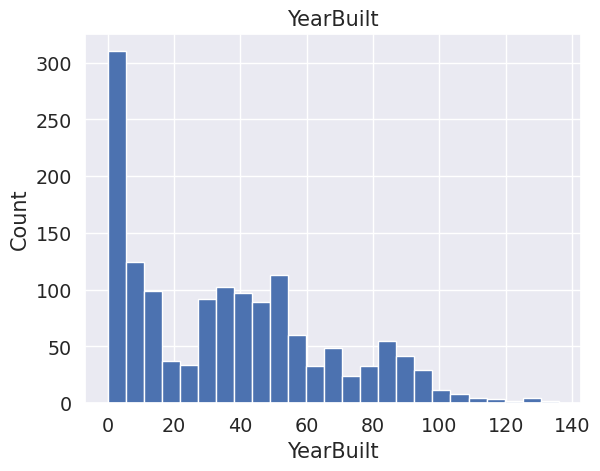

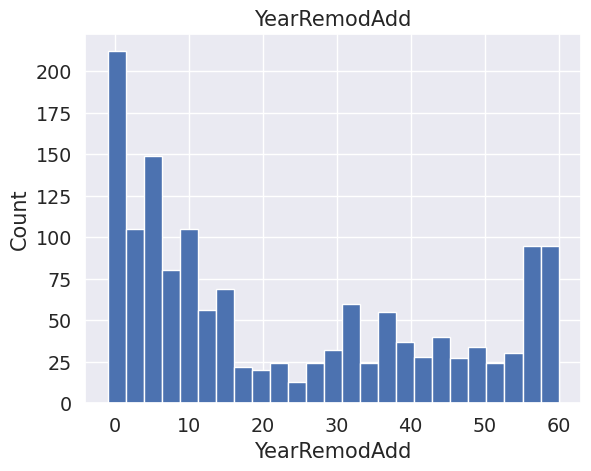

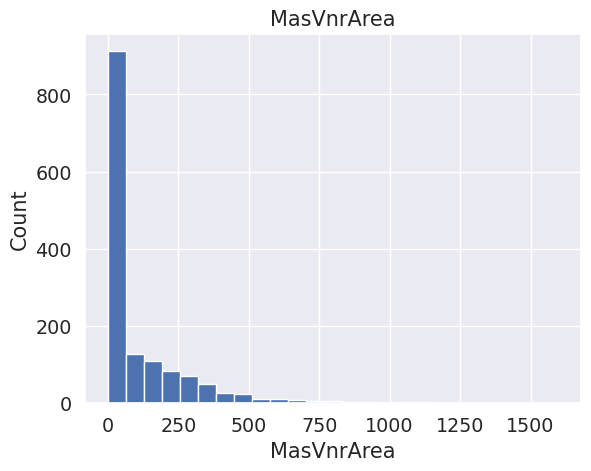

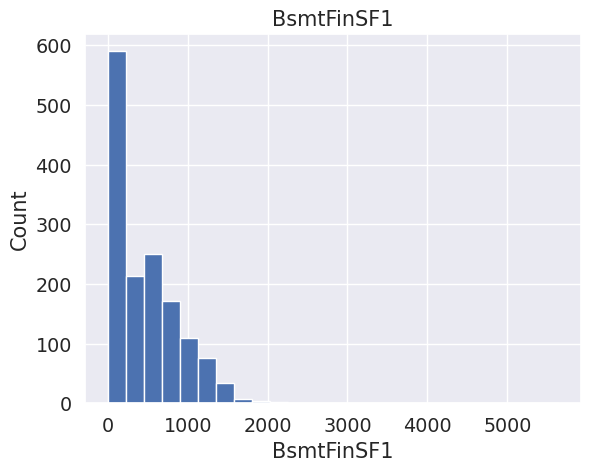

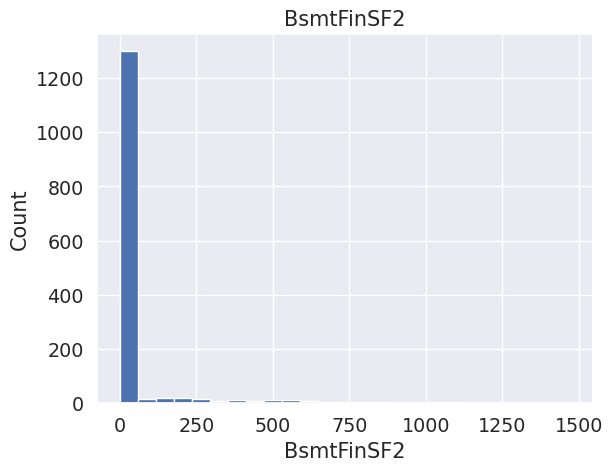

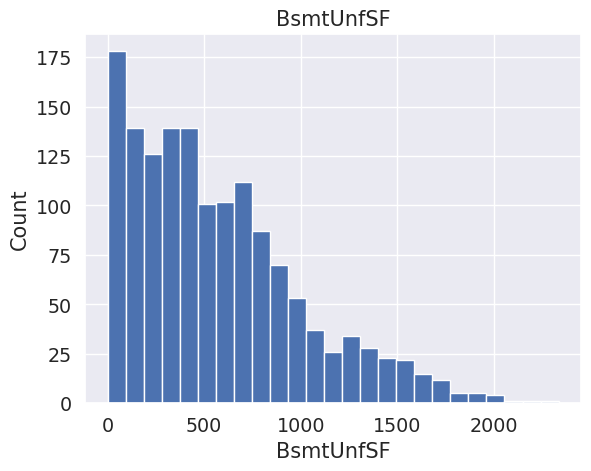

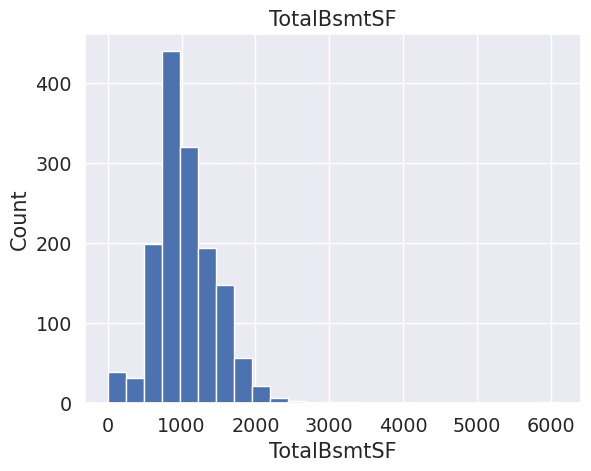

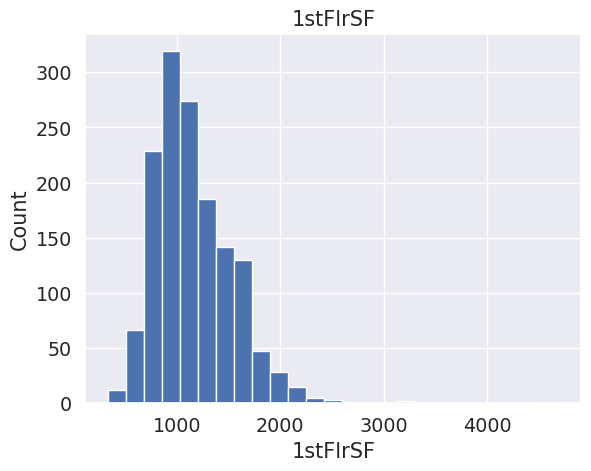

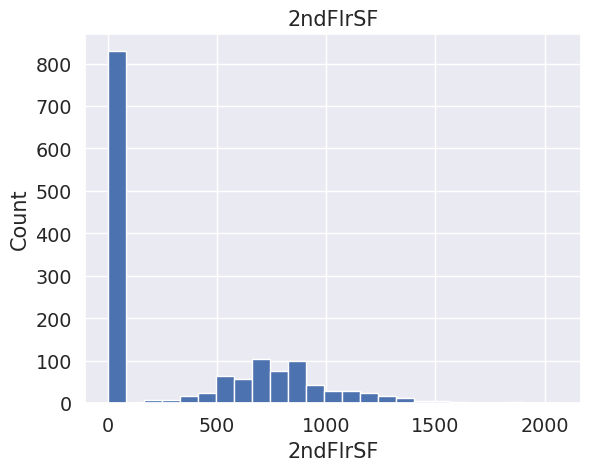

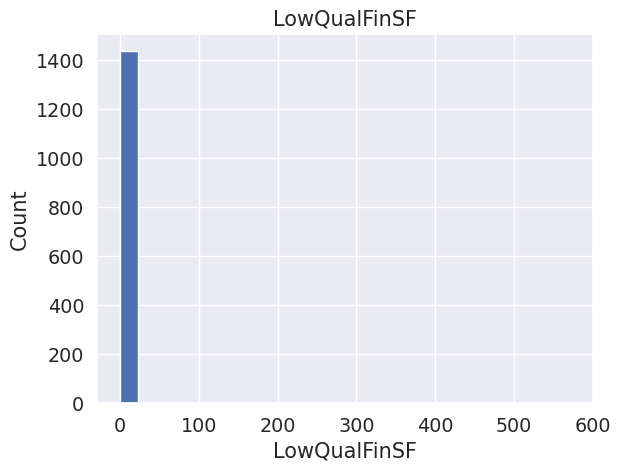

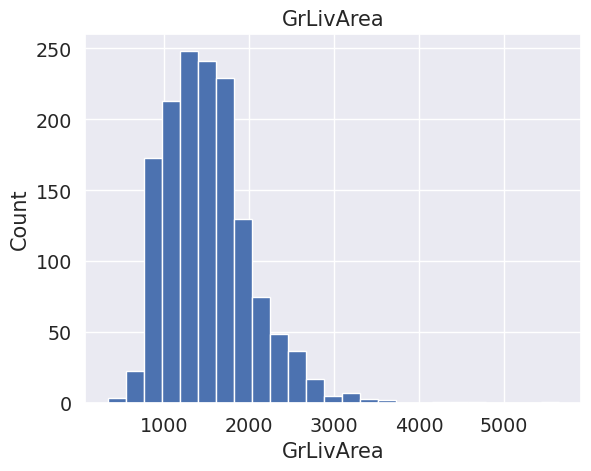

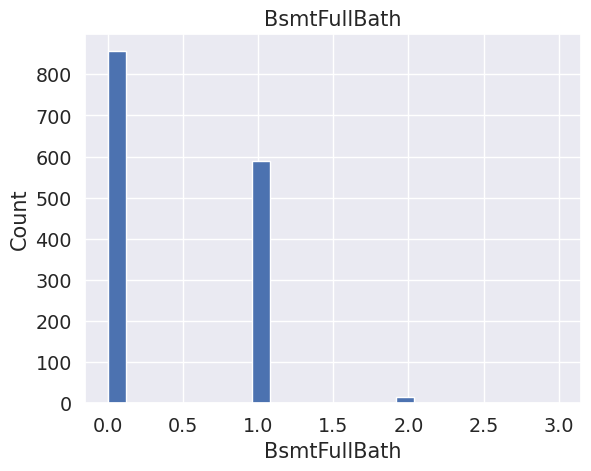

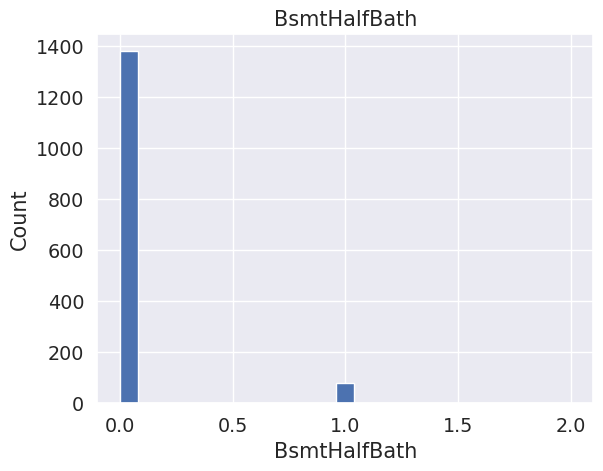

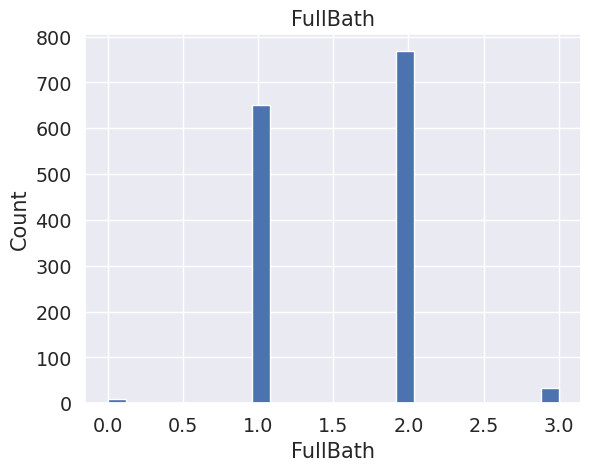

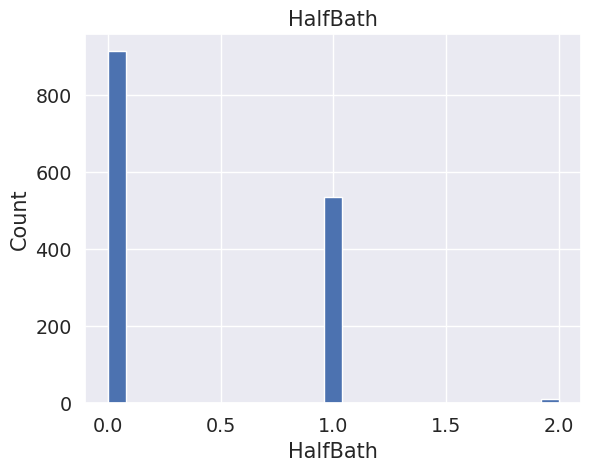

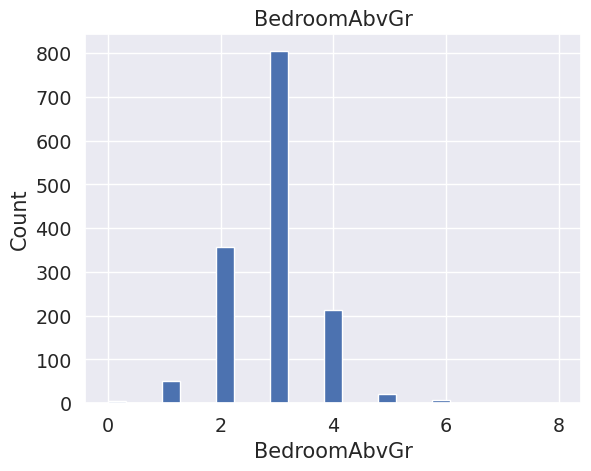

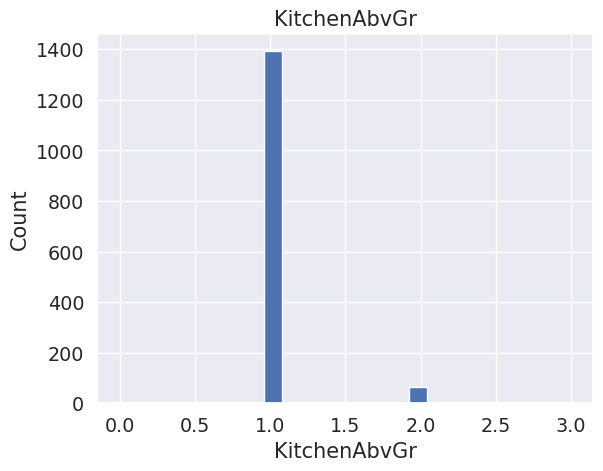

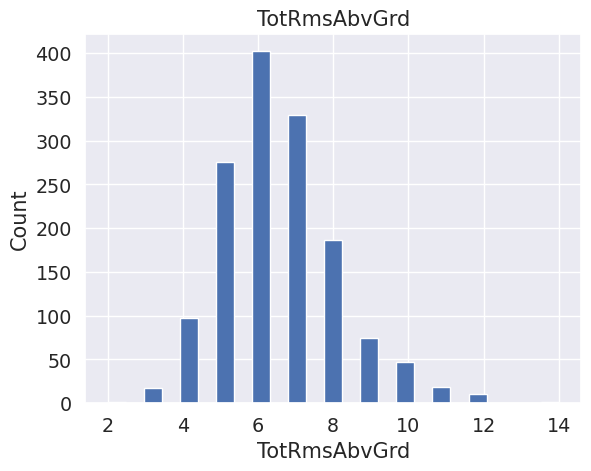

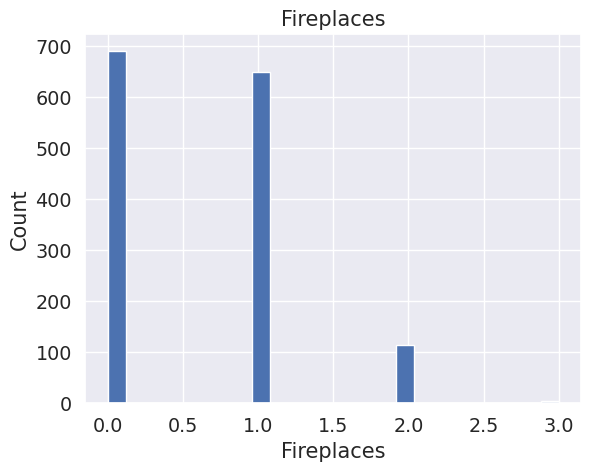

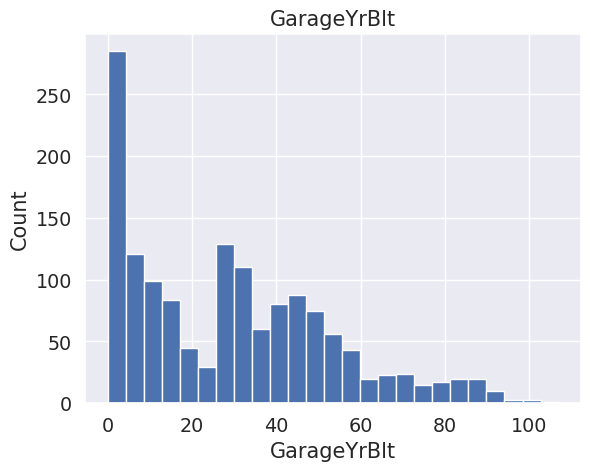

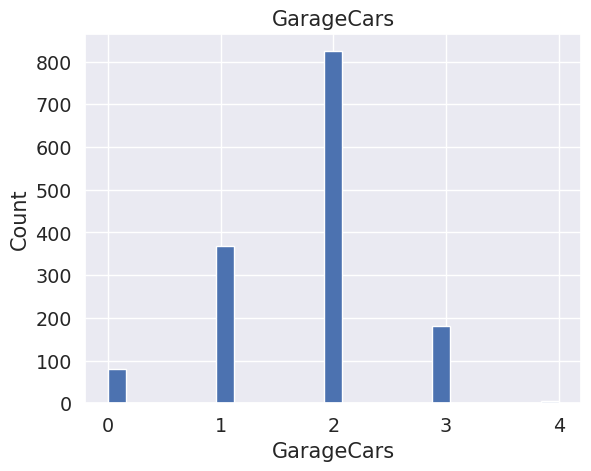

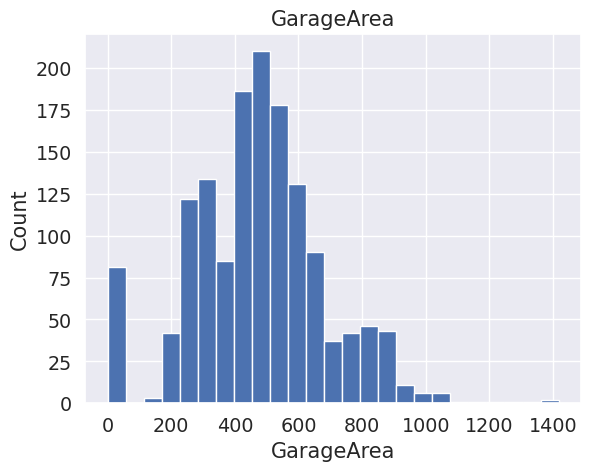

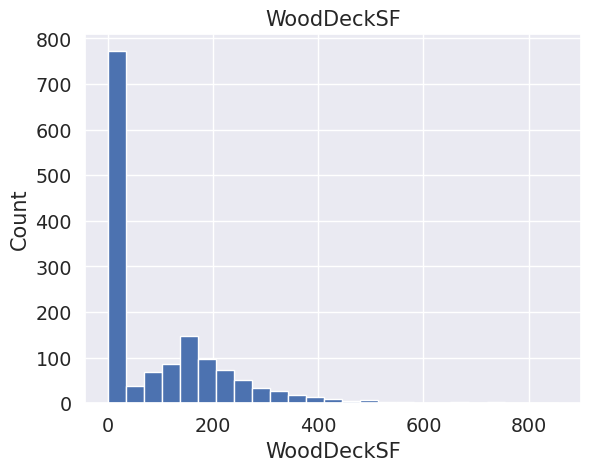

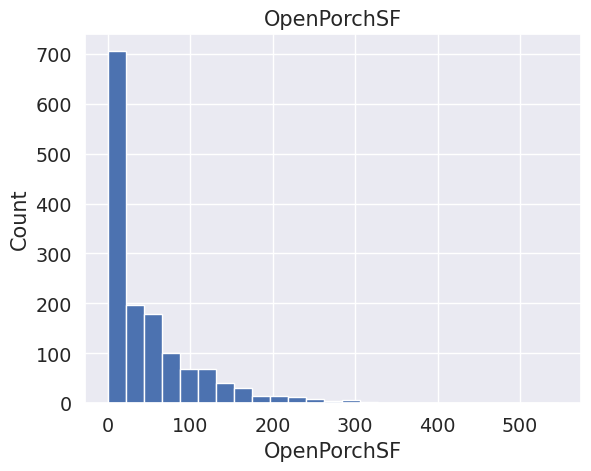

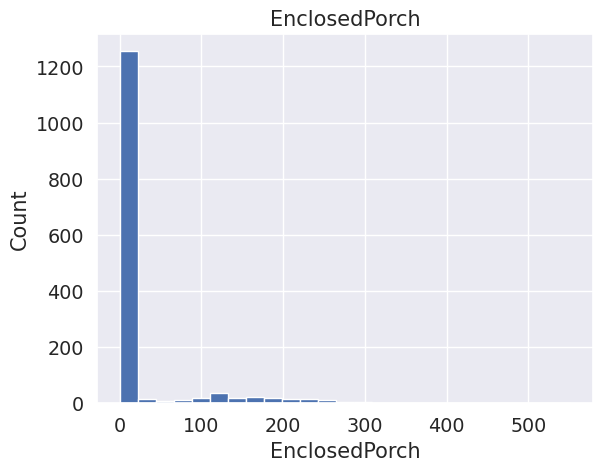

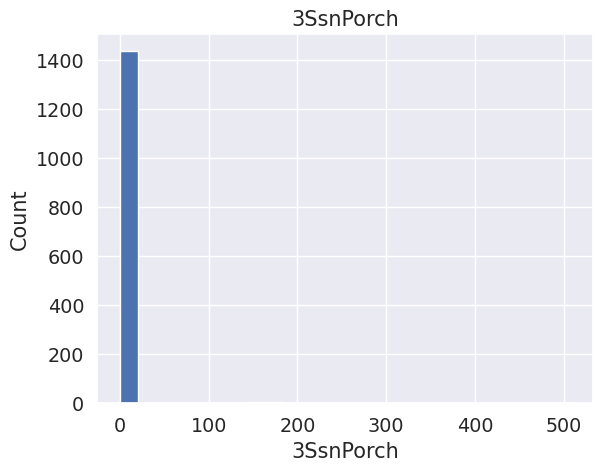

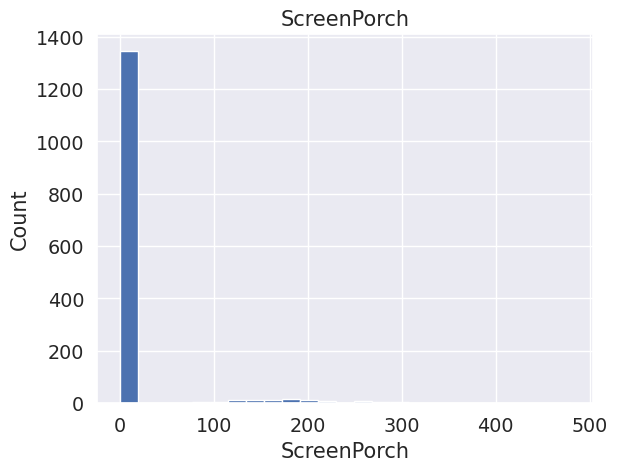

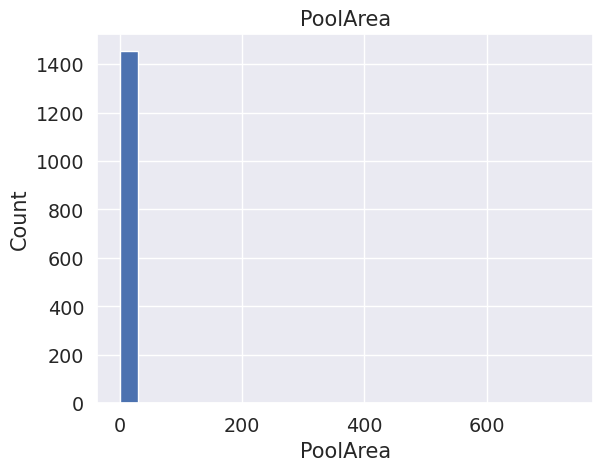

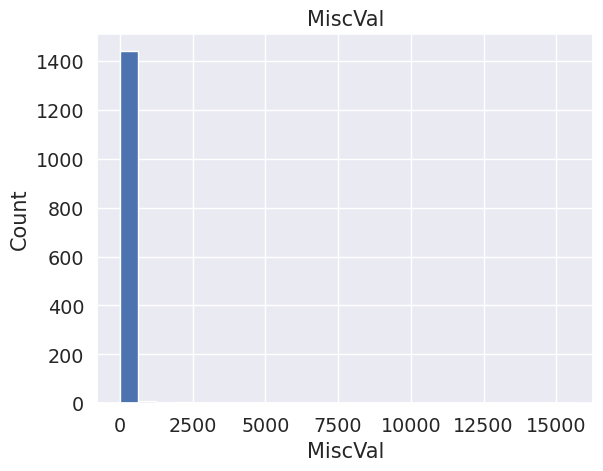

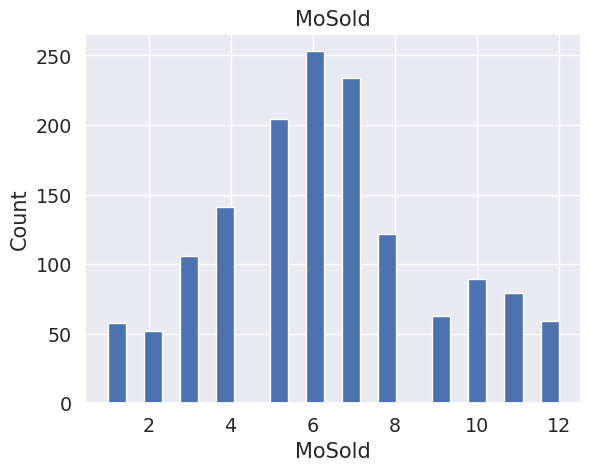

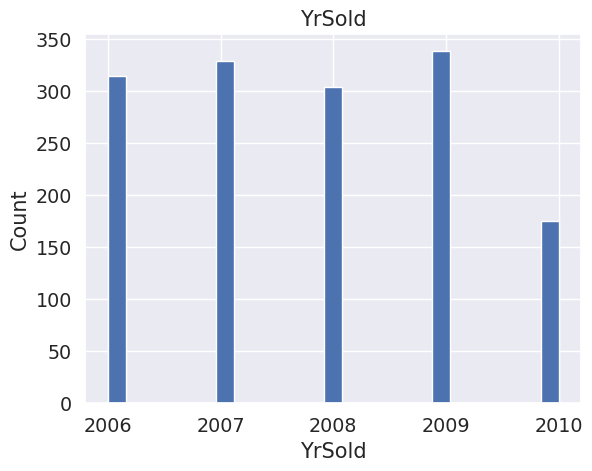

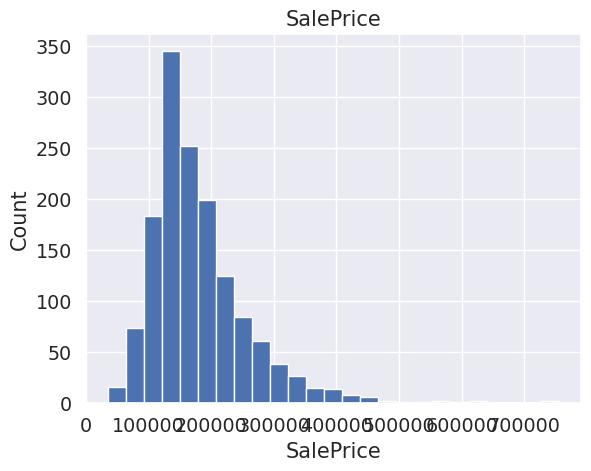

In [307]:
# Visualizing the Data Columns
for feature in num_col:
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

**Feature Transformation**

In [ ]:
import numpy as np
num_features=['LotArea', '1stFlrSF', 'GrLivArea','SalePrice']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

**Feature Encoding**

In [ ]:
for feature in cate_col:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [ ]:
dataset.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,3,9.041922,1,0,1,1,0,0,15,3,4,3,6,7,5,5,5,1,2,12,13,196.0,2,3,5,3,3,1,6,706,5,0,150,856,5,4,1,5,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,6,0,5,5.0,2,2,548,3,5,2,0,61,0,0,0,0,0,2,2008,4,4,12.247694
1,1,2,20,3,9.169518,1,0,1,1,2,0,20,1,4,3,4,6,8,31,31,1,2,6,6,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,5,4,1,5,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,6,1,5,31.0,2,2,460,3,5,2,298,0,0,0,0,0,0,5,2007,4,4,12.109011
2,2,3,60,3,9.328123,1,1,1,1,0,0,15,3,4,3,6,7,5,7,6,1,2,12,13,162.0,2,3,5,3,3,2,6,486,5,0,434,920,5,4,1,5,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,6,1,5,7.0,2,2,608,3,5,2,0,42,0,0,0,0,0,9,2008,4,4,12.317167
3,3,4,70,3,9.164296,1,1,1,1,1,0,17,3,4,3,6,7,5,91,36,1,2,4,7,0.0,1,3,1,2,4,1,4,216,5,0,540,756,5,3,1,5,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,6,1,2,8.0,1,3,642,3,5,2,0,35,272,0,0,0,0,2,2006,4,1,11.849398
4,4,5,60,3,9.565214,1,1,1,1,2,0,24,3,4,3,6,8,5,8,8,1,2,12,13,350.0,2,3,5,3,3,3,6,655,5,0,490,1145,5,4,1,5,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,6,1,5,8.0,2,3,836,3,5,2,192,84,0,0,0,0,0,12,2008,4,4,12.429216


**Feature Selection**

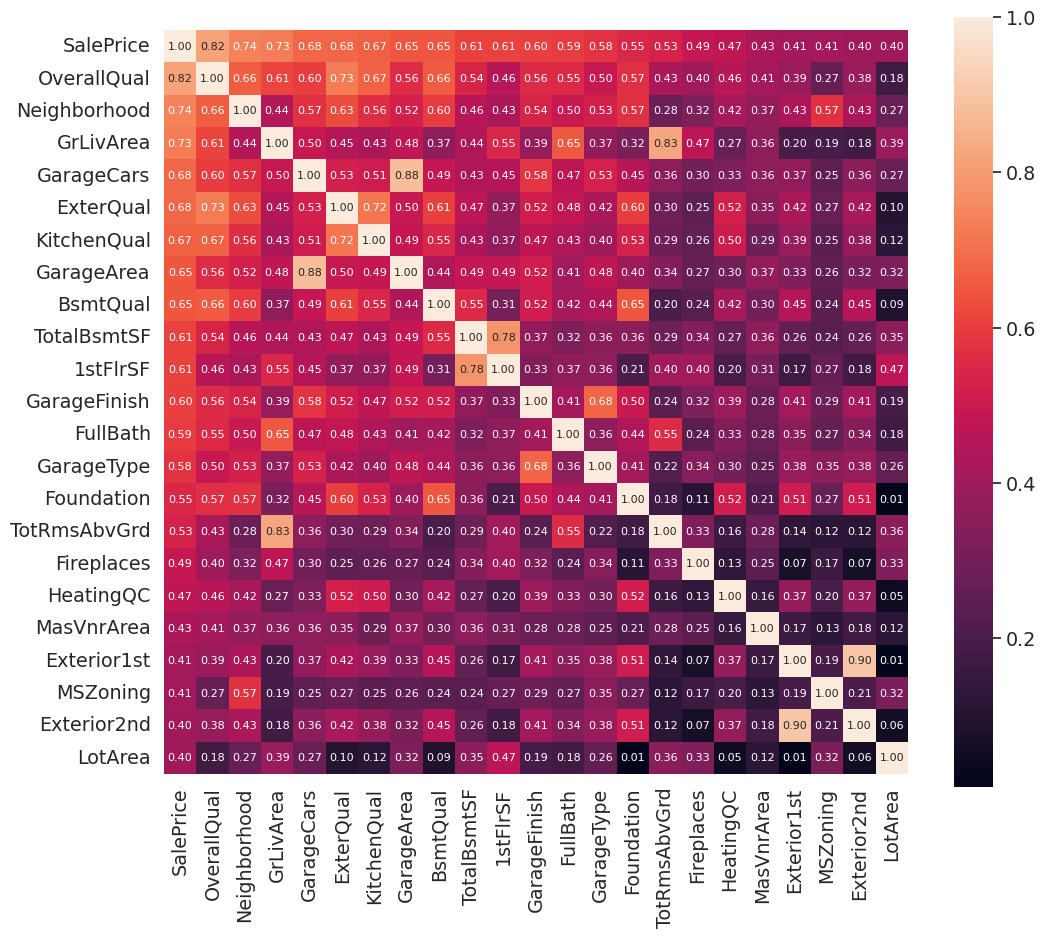

In [ ]:
# I tried to Select K best features and have played with numbers and finally decided to take 23 features.
import seaborn as sns

corrmat = dataset.corr()
k = 23
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dataset[cols].values.T)

sns.set(font_scale=1.25)
plt.figure(figsize=(12, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [ ]:
# Getting those Features' correlation values with 'SalePrice' feature
corrmat.nlargest(k, 'SalePrice')['SalePrice'].sort_values()

,SalePrice
LotArea,0.399918
Exterior2nd,0.402828
MSZoning,0.410575
Exterior1st,0.413927
MasVnrArea,0.429531
HeatingQC,0.473762
Fireplaces,0.489449
TotRmsAbvGrd,0.534422
Foundation,0.550411
GarageType,0.575628


In [ ]:
dataset = dataset[cols]

In [ ]:
dataset.head()

,SalePrice,OverallQual,Neighborhood,GrLivArea,GarageCars,ExterQual,KitchenQual,GarageArea,BsmtQual,TotalBsmtSF,1stFlrSF,GarageFinish,FullBath,GarageType,Foundation,TotRmsAbvGrd,Fireplaces,HeatingQC,MasVnrArea,Exterior1st,MSZoning,Exterior2nd,LotArea
0,12.247694,7,15,7.444249,2,2,2,548,3,856,6.752270,2,2,5,5,8,0,4,196.0,12,3,13,9.041922
1,12.109011,6,20,7.140453,2,1,1,460,3,1262,7.140453,2,2,5,2,6,1,4,0.0,6,3,6,9.169518
2,12.317167,7,15,7.487734,2,2,2,608,3,920,6.824374,2,2,5,5,6,1,4,162.0,12,3,13,9.328123
3,11.849398,7,17,7.448334,3,1,2,642,2,756,6.867974,1,1,2,1,7,1,3,0.0,4,3,7,9.164296
4,12.429216,8,24,7.695303,3,2,2,836,3,1145,7.043160,2,2,5,5,9,1,4,350.0,12,3,13,9.565214


In [ ]:
# Creating X_train and y_train
y_train=dataset['SalePrice']

In [ ]:
X_train=dataset.drop(['SalePrice'],axis=1)

**Feature Scaling**

In [169]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)

sc_y = StandardScaler()
y_train = np.array(dataset['SalePrice']).reshape(-1,1)
y_train = sc_y.fit_transform(y_train)

**Test Dataset**

In [170]:
dataset_test = pd.read_csv('Cleaned-Test(new).csv')

**Feature Engineering**

**Feature Transformation**

In [171]:
import numpy as np
num_features=['LotArea', '1stFlrSF', 'GrLivArea','SalePrice']

for feature in num_features:
    dataset_test[feature]=np.log(dataset_test[feature])

**Feature Encoding**

In [172]:
for feature in cate_col:
    labels_ordered=dataset_test.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset_test[feature]=dataset_test[feature].map(labels_ordered)

In [173]:
dataset_test = dataset_test[cols]

In [174]:
# Creating y_test and X_test
y_test=dataset_test['SalePrice']

In [175]:
X_test=dataset_test.drop(['SalePrice'],axis=1)

**Feature Scaling**

In [194]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_test = sc_X.fit_transform(X_test)

sc_y = StandardScaler()
y_test = np.array(dataset_test['SalePrice']).reshape(-1,1)
y_test = sc_y.fit_transform(y_test)

**Random Forest Regressor**

In [195]:
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100,200]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10,20]

In [196]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 272, 445, 618, 790, 963, 1136, 1309, 1481, 1654, 1827, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100, 200], 'min_samples_leaf': [1, 2, 5, 10, 20]}


In [197]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [198]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=200, n_estimators=1481; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=200, n_estimators=1481; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=200, n_estimators=1481; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=200, n_estimators=1481; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=200, n_estimators=1481; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=790; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=790; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=10

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1827; total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1827; total time=   4.3s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1827; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1827; total time=   3.8s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1827; total time=   4.1s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=200, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=200, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=200, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=200, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=200, n_estimators=100; total time=   0.3s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=618; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=618; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=618; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=618; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=618; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=618; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=618; total time=   0.0s
[CV] END max_depth=25, max_feat

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 20],
                                        'min_samples_split': [2, 5, 10, 15, 100,
                                                              200],
                                        'n_estimators': [100, 272, 445, 618,
                                                         790, 963, 1136, 1309,
                                                         1481, 1654, 1827,
                                                         2000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [199]:
rf_random.best_params_

{'n_estimators': 1827,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5}

In [200]:
predictions = rf_random.predict(X_test)

In [245]:
predictions_tr = sc.inverse_transform(predictions.reshape(-1, 1))
y_test_tr = sc.inverse_transform(y_test.reshape(-1, 1))

predictions_actual = np.exp(predictions_tr)
y_test_actual = np.exp(y_test_tr)

In [246]:
predictions_actual

array([[203565.47330131],
       [173400.6446862 ],
       [209711.6332382 ],
       ...,
       [222304.48208063],
       [133107.59754743],
       [139575.08483124]])

In [250]:
y_test_actual = y_test_actual.ravel()
y_test_actual

array([208500., 181500., 223500., ..., 266500., 142125., 147500.])

<ipython-input-302-ac6f9b5d84c9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_actual - predictions, color='lightseagreen')


<Axes: ylabel='Density'>

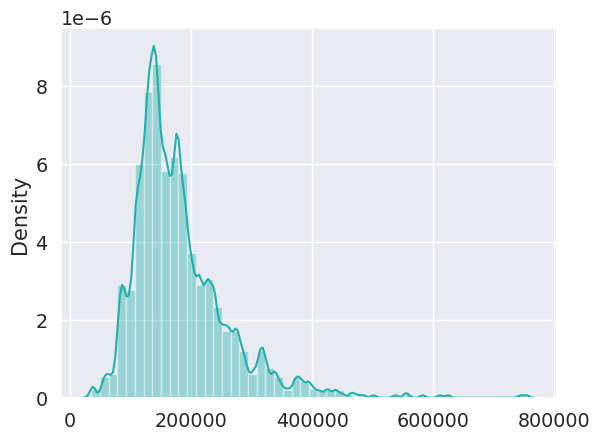

In [302]:
import seaborn as sns
sns.distplot(y_test_actual - predictions, color='lightseagreen')

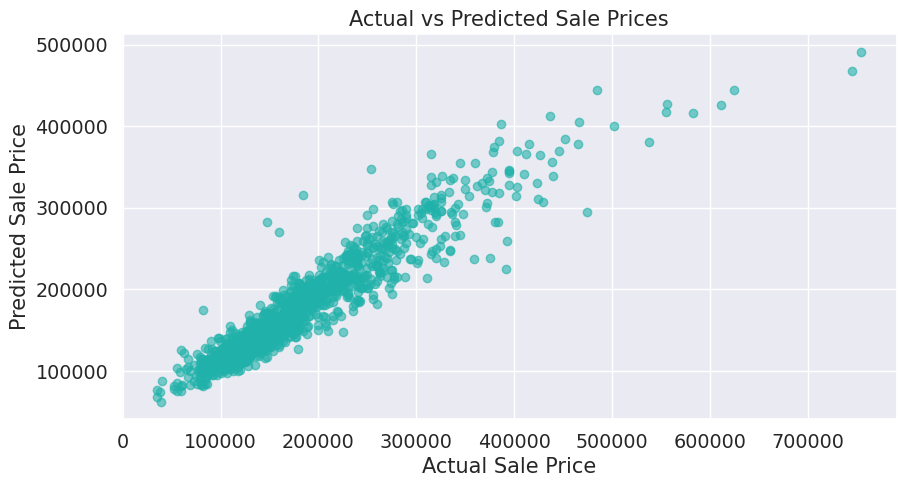

In [299]:
plt.figure(figsize=(10, 5))  # Width: 10 inches, Height: 6 inches
plt.scatter(y_test_actual, predictions_actual, alpha=0.6, color='lightseagreen')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Prices")
plt.grid(True)
plt.show()

In [300]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

r2 = r2_score(y_test_actual, predictions_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions_actual))
mae = mean_absolute_error(y_test_actual, predictions_actual)

print(f"R2 Score: {r2}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

R2 Score: 0.863115226552589
Root Mean Squared Error: 29382.023869812918
Mean Absolute Error: 17938.82688191865


In [301]:
y = pd.DataFrame(predictions_actual,columns=["SalePrice"])
y

,SalePrice
0,203565.473301
1,173400.644686
2,209711.633238
3,181214.964298
4,291133.910951
5,141098.702795
6,262372.967980
7,200852.751723
8,151389.484363
9,123373.458728
